### Importing the required libraries

In [0]:
import pandas as pd #pandas for manipulation and analysis
import matplotlib.pyplot as plt # for plotting various types of plots
import seaborn as sns #Seaborn is a Python data visualization library 
import numpy as np 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split #Provides train/test indices to split data in train/test sets

## Uploading dataset


> Uploading the .csv data from Drive as the data is present in zip file so unzipping it.





In [0]:
!unzip 'drive/My Drive/train.csv.zip'

### Reading the data using pandas

In [0]:
data_1 = pd.read_csv('train.csv')

Size of the dataframe


In [5]:
data_1.shape

(2380557, 54)

In [6]:
data_1.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


### Description

Info:

> The number of features, total entities, Dtype of columns and memory usage of dataframe

Describe:

> The count, mean, std, min, 25%, 50%, 75% and max in features






In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [8]:
data_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
search_id,2380557.0,333701.625686,192371.850496,4.0000,167426.0000,333272.0000,500705.000,6.655730e+05
site_id,2380557.0,9.970224,7.667827,1.0000,5.0000,5.0000,14.000,3.400000e+01
user_country_id,2380557.0,175.458752,65.859339,1.0000,100.0000,219.0000,219.000,2.310000e+02
user_hist_stars,122780.0,3.382814,0.694562,1.5000,2.9500,3.4500,3.950,5.000000e+00
user_hist_paid,123494.0,178.094940,108.568025,0.0000,111.0900,152.6200,215.950,1.507120e+03
listing_country_id,2380557.0,173.915948,68.324828,1.0000,100.0000,219.0000,219.000,2.300000e+02
listing_id,2380557.0,70081.903362,40603.977545,1.0000,35028.0000,69615.0000,105142.000,1.408210e+05
listing_stars,2380557.0,3.180607,1.052086,0.0000,3.0000,3.0000,4.000,5.000000e+00
listing_review_score,2377071.0,3.779416,1.049727,0.0000,3.5000,4.0000,4.500,5.000000e+00
is_brand,2380557.0,0.634688,0.481518,0.0000,0.0000,1.0000,1.000,1.000000e+00


The list of rows with booked vaalue 1

In [9]:
data_1[data_1['booked']==1]


,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
35,28,2012-11-26 10:13:17,5,219,NaN,NaN,219,13996,4,4.0,1,2.89,0.0491,5.07,26,85.00,0,24232,3,27,1,0,1,0,NaN,116.14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,9.0,1,286.32,1
88,30,2013-02-11 01:28:38,24,216,NaN,NaN,219,125611,3,3.5,1,4.55,0.2653,5.63,13,176.98,1,20319,9,13,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,1831.30,1
95,44,2013-03-19 15:57:46,15,55,NaN,NaN,55,13205,4,4.5,0,5.14,0.1550,5.46,1,126.83,1,24752,1,1,1,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,42.0,NaN,NaN,NaN,1.0,0.0,42.0,NaN,NaN,NaN,1,126.89,1
147,66,2013-03-04 20:44:30,5,219,NaN,NaN,219,35202,3,4.5,1,2.71,NaN,4.80,12,84.00,0,5483,1,18,2,0,1,1,-25.8023,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,96.39,1
199,80,2013-01-03 10:58:19,5,219,2.5,122.34,219,107761,4,3.5,1,2.64,0.5445,4.99,4,127.00,0,7274,2,24,1,0,1,0,NaN,386.87,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,1,324.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380333,665527,2013-03-24 19:38:17,5,219,NaN,NaN,219,119322,4,4.0,1,4.63,0.1855,5.58,16,186.00,0,15208,5,124,2,1,1,0,NaN,4967.39,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1059.78,1
2380377,665533,2013-03-24 21:28:42,5,219,NaN,NaN,219,85599,3,0.0,1,2.77,0.0688,5.40,2,543.00,0,5206,3,236,1,0,1,1,NaN,1771.30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1870.62,1
2380389,665535,2013-03-21 19:34:47,5,219,NaN,NaN,219,55964,3,4.0,1,1.39,0.4329,4.40,2,97.00,0,18019,3,176,2,0,1,1,NaN,273.86,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,323.20,1
2380409,665539,2012-11-24 16:45:09,5,219,NaN,NaN,219,66515,3,4.0,1,1.95,0.0379,4.83,25,75.00,0,9421,1,1,2,0,1,0,NaN,254.25,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,84.57,1


In [10]:
data_1[data_1['booked']==0]

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,117267,4,4.5,1,2.94,0.1153,5.91,15,259.0,1,7037,1,3,2,2,1,0,NaN,2563.84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2380553,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,125075,4,4.5,1,3.09,0.0304,6.21,8,349.0,0,7037,1,3,2,2,1,0,NaN,2558.31,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380554,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,127402,5,4.5,1,2.56,0.0483,6.21,16,429.0,0,7037,1,3,2,2,1,0,NaN,2560.30,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380555,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,128251,3,4.0,1,3.33,0.0410,5.63,6,175.0,1,7037,1,3,2,2,1,0,NaN,2557.77,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


## Correlation

> The correlation between the features in the dataframe followed by correlation matrix



In [11]:
data_1.corr()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
search_id,1.000000,0.003338,-0.000633,-0.000741,-0.021676,-0.001352,-0.000353,0.000264,-0.000069,-0.001236,0.001658,-0.002855,-0.001783,0.002956,-0.002613,0.001311,-0.000872,-0.000680,0.002611,0.002328,-0.003353,-0.004294,0.002088,-0.000766,0.005886,-0.001303,-0.001731,-0.001104,0.002704,0.001654,0.000289,0.000953,0.000745,-0.000184,-0.001455,0.003701,-0.001258,-0.009624,0.000726,0.002499,-0.003097,-0.001772,0.000794,0.006069,0.004199,-0.003893,0.002156,0.001695,-0.000787,0.000319,-0.000719,-0.003377,-0.000324
site_id,0.003338,1.000000,-0.304867,0.307889,0.083580,-0.316166,0.003156,0.173546,-0.072936,-0.198551,0.179594,0.064470,0.023578,-0.031008,-0.001891,0.083838,0.020703,0.107595,0.173011,-0.019009,-0.040890,0.025075,-0.080444,0.063754,0.347429,0.023869,0.015974,-0.004186,0.056979,0.049452,0.008568,0.004645,0.036206,0.055989,0.000076,-0.016667,-0.096615,-0.020598,-0.019669,-0.017784,-0.000071,-0.000279,-0.011374,-0.001176,0.003143,-0.021009,-0.003627,0.015761,-0.007528,-0.000828,0.008371,0.087384,-0.000576
user_country_id,-0.000633,-0.304867,1.000000,-0.254607,-0.061223,0.475955,0.000759,-0.111548,0.062330,0.182769,-0.125767,-0.016222,-0.018009,0.017506,0.000112,-0.033014,-0.002611,-0.098039,-0.086305,0.004711,0.012882,-0.027814,0.065441,0.028159,-0.061436,-0.035113,-0.003522,0.000968,-0.096156,-0.026659,-0.009236,0.000456,-0.022616,-0.040318,-0.002936,0.018902,0.052196,0.009703,0.024301,0.023060,-0.002712,0.002716,0.002433,-0.012217,-0.001957,-0.006318,-0.016298,-0.017937,0.012186,0.000831,-0.004951,-0.072842,0.002178
user_hist_stars,-0.000741,0.307889,-0.254607,1.000000,0.487225,-0.301045,0.008177,0.279543,0.000278,-0.190238,0.259366,0.059883,0.077023,-0.014370,0.178169,0.087977,-0.010702,0.072050,0.089112,-0.026011,0.012279,0.009203,-0.008735,-0.016602,0.281867,0.009415,-0.020711,0.021245,-0.068526,0.035002,0.024932,0.020272,0.040056,0.040726,0.010417,-0.023272,-0.028897,-0.063644,-0.015781,-0.022554,0.010274,-0.005714,-0.001355,-0.000537,0.003156,0.026186,0.007809,0.044701,-0.018056,0.000671,0.001130,0.214766,-0.000805
user_hist_paid,-0.021676,0.083580,-0.061223,0.487225,1.000000,-0.069117,-0.003065,0.145106,0.046773,-0.056761,0.152373,0.035215,0.040763,-0.014426,0.185226,0.045579,-0.030822,0.078088,0.105317,0.014684,0.063668,0.000695,-0.004695,0.014915,0.162109,0.025464,0.020488,-0.021678,-0.057275,0.000761,0.023064,-0.000327,-0.009931,-0.016785,0.009559,0.011023,0.049691,0.000429,-0.001823,-0.026166,0.014567,-0.005862,0.009578,-0.013489,0.009881,0.003239,-0.008130,0.018274,-0.015989,0.001329,0.001298,0.326537,-0.000306
listing_country_id,-0.001352,-0.316166,0.475955,-0.301045,-0.069117,1.000000,-0.000912,-0.163322,0.091492,0.313086,-0.190321,-0.033549,-0.023944,0.029805,-0.005523,-0.041516,-0.016077,-0.084760,-0.111895,0.029754,0.053629,-0.014131,0.073588,0.014772,-0.372571,-0.028674,-0.117442,-0.019858,-0.078292,-0.051075,-0.015176,-0.000514,-0.058703,-0.067060,-0.004327,0.031898,0.125544,0.019586,0.032551,0.030676,

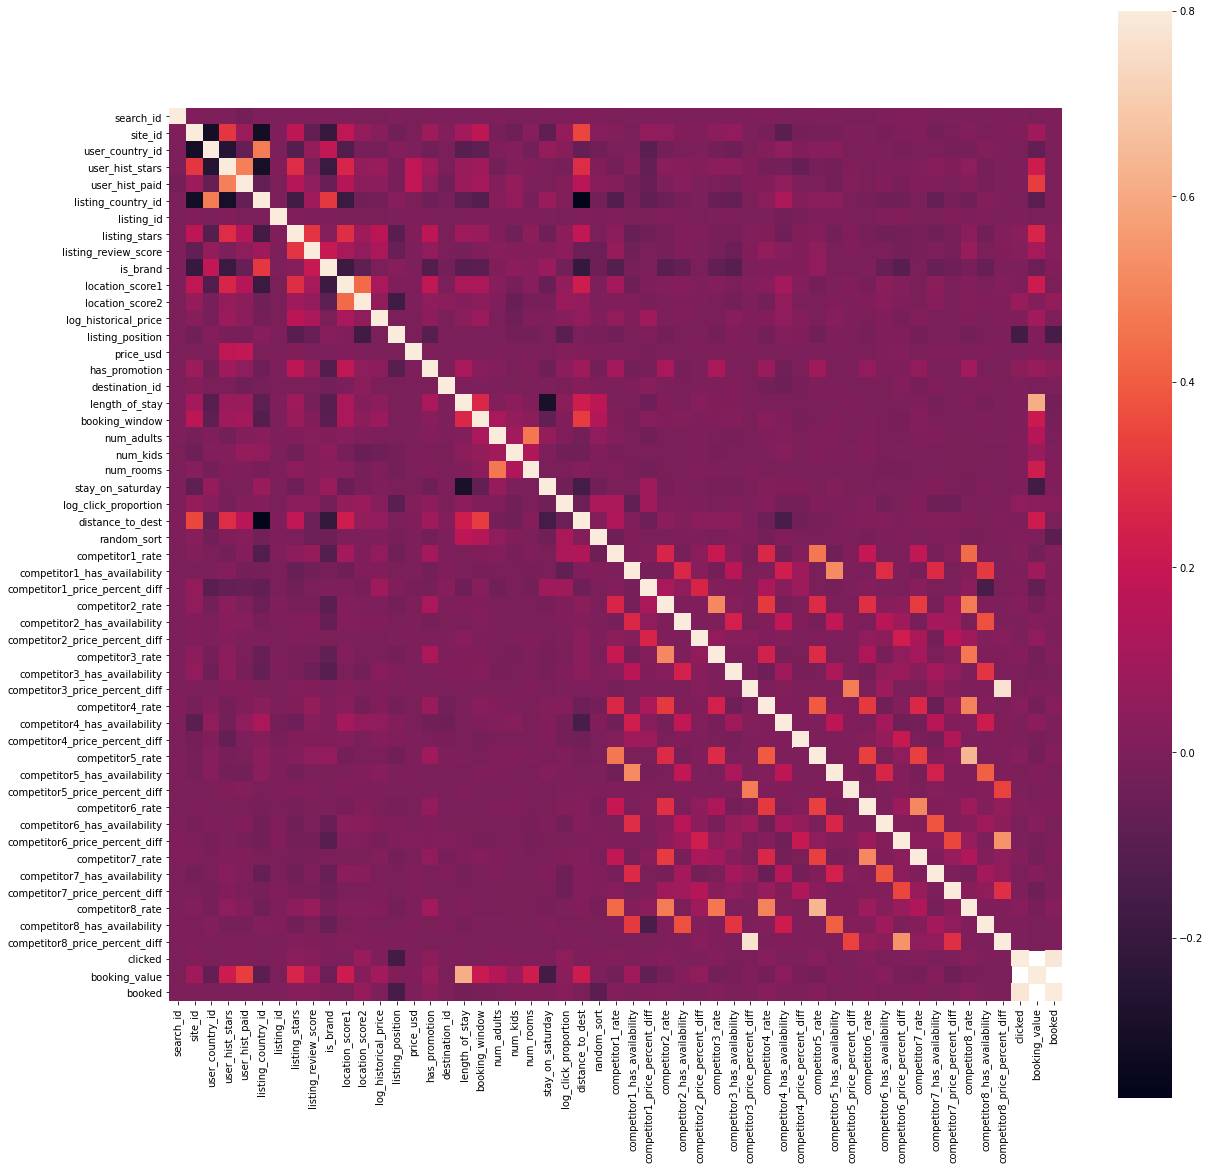

In [12]:
#correlation matrix
corrmat = data_1.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

### Null Values

> The number of null values present in the each feature of the dataframe.

> The percentages of null values present dataframe.





In [14]:
data_1.isnull().sum(axis = 0)

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [15]:
data_1.isna().mean().round(4) * 100

search_id                          0.00
timestamp                          0.00
site_id                            0.00
user_country_id                    0.00
user_hist_stars                   94.84
user_hist_paid                    94.81
listing_country_id                 0.00
listing_id                         0.00
listing_stars                      0.00
listing_review_score               0.15
is_brand                           0.00
location_score1                    0.00
location_score2                   22.10
log_historical_price               0.00
listing_position                   0.00
price_usd                          0.00
has_promotion                      0.00
destination_id                     0.00
length_of_stay                     0.00
booking_window                     0.00
num_adults                         0.00
num_kids                           0.00
num_rooms                          0.00
stay_on_saturday                   0.00
log_click_proportion              93.61


### The list of features where the null value percentage is > 80%.

> As the 80% or above data is missing from the features they are not so usefull while predicting or classifing the data.

> So, Drop these columns.





In [0]:
lst = ['timestamp','user_hist_stars','user_hist_paid','log_click_proportion','competitor1_rate','competitor1_has_availability','competitor1_price_percent_diff','competitor2_price_percent_diff','competitor3_price_percent_diff','competitor4_rate','competitor4_has_availability','competitor4_price_percent_diff','competitor6_rate','competitor6_has_availability','competitor6_price_percent_diff','competitor7_rate','competitor7_has_availability','competitor7_price_percent_diff','competitor8_price_percent_diff']

In [0]:
dataf_2 = data_1.drop(columns = lst,axis = 1)


The size of the dataframe after dropping the High null value columns.

In [18]:
dataf_2.shape

(2380557, 35)

In [19]:
dataf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 35 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   site_id                         int64  
 2   user_country_id                 int64  
 3   listing_country_id              int64  
 4   listing_id                      int64  
 5   listing_stars                   int64  
 6   listing_review_score            float64
 7   is_brand                        int64  
 8   location_score1                 float64
 9   location_score2                 float64
 10  log_historical_price            float64
 11  listing_position                int64  
 12  price_usd                       float64
 13  has_promotion                   int64  
 14  destination_id                  int64  
 15  length_of_stay                  int64  
 16  booking_window                  int64  
 17  num_adults                 

In [20]:
dataf_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
search_id,2380557.0,333701.625686,192371.850496,4.00,167426.0000,333272.0000,500705.000,665573.00
site_id,2380557.0,9.970224,7.667827,1.00,5.0000,5.0000,14.000,34.00
user_country_id,2380557.0,175.458752,65.859339,1.00,100.0000,219.0000,219.000,231.00
listing_country_id,2380557.0,173.915948,68.324828,1.00,100.0000,219.0000,219.000,230.00
listing_id,2380557.0,70081.903362,40603.977545,1.00,35028.0000,69615.0000,105142.000,140821.00
listing_stars,2380557.0,3.180607,1.052086,0.00,3.0000,3.0000,4.000,5.00
listing_review_score,2377071.0,3.779416,1.049727,0.00,3.5000,4.0000,4.500,5.00
is_brand,2380557.0,0.634688,0.481518,0.00,0.0000,1.0000,1.000,1.00
location_score1,2380557.0,2.878558,1.536947,0.00,1.7900,2.7700,4.060,6.98
location_score2,1854565.0,0.131032,0.160594,0.00,0.0191,0.0694,0.181,1.00


Nullvalues in dataframe2

> Fill these null values according to the data present in the feature.
We can fill data using mean, median, mode or 0 etc.



In [21]:
dataf_2.isnull().sum(axis = 0)

search_id                               0
site_id                                 0
user_country_id                         0
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                        0
distance_to_dest                   770336
random_sort                             0
competitor2_rate                  

In [0]:
li = dataf_2.columns

In [23]:
for i in li:
  print('For feature : ',i)
  print(data_1[i].mean())
  print(data_1[i].median())
  print(data_1[i].mode()[0])

For feature :  search_id
333701.6256855013
333272.0
223395
For feature :  site_id
9.970223775360136
5.0
5
For feature :  user_country_id
175.458752300407
219.0
219
For feature :  listing_country_id
173.91594782229538
219.0
219
For feature :  listing_id
70081.90336211231
69615.0
104517
For feature :  listing_stars
3.1806068915804158
3.0
3
For feature :  listing_review_score
3.7794157179150307
4.0
4.0
For feature :  is_brand
0.6346880162919855
1.0
1
For feature :  location_score1
2.8785584298182645
2.77
0.0
For feature :  location_score2
0.13103247947634408
0.0694
0.0002
For feature :  log_historical_price
4.3117793272767715
4.91
0.0
For feature :  listing_position
16.86762929852131
16.0
1
For feature :  price_usd
291.5203162369196
122.25
99.0
For feature :  has_promotion
0.21492365022135576
0.0
0
For feature :  destination_id
14046.417023410908
13539.0
8192
For feature :  length_of_stay
2.3938246385194724
2.0
1
For feature :  booking_window
37.68373158046625
17.0
1
For feature :  num_ad

### Filling the null values



In [0]:
dataf_2['location_score2'].fillna(dataf_2['location_score2'].median(), inplace=True)

In [0]:
dataf_2['distance_to_dest'].fillna(dataf_2['distance_to_dest'].mean(), inplace=True)

In [0]:
dataf_2['competitor3_rate'].fillna(dataf_2['competitor3_rate'].mode()[0], inplace=True)

In [0]:
dataf_2['competitor2_rate'].fillna(dataf_2['competitor2_rate'].mode()[0], inplace=True)

In [0]:
dataf_2['competitor8_rate'].fillna(dataf_2['competitor8_rate'].mode()[0], inplace=True)

In [0]:
dataf_2['competitor5_rate'].fillna(dataf_2['competitor5_rate'].mode()[0], inplace=True)

In [0]:
dataf_2['listing_review_score'].fillna(dataf_2['listing_review_score'].mean(), inplace=True)

In [0]:
dataf_2['competitor2_has_availability'].fillna(dataf_2['competitor2_has_availability'].mode()[0], inplace=True)

In [0]:
dataf_2['competitor3_has_availability'].fillna(dataf_2['competitor3_has_availability'].mode()[0], inplace=True)

In [0]:
dataf_2['competitor5_has_availability'].fillna(dataf_2['competitor5_has_availability'].mode()[0], inplace=True)

In [0]:
dataf_2['competitor8_has_availability'].fillna(dataf_2['competitor8_has_availability'].mode()[0], inplace=True)

In [0]:
dataf_2['competitor5_price_percent_diff'].fillna(dataf_2['competitor5_price_percent_diff'].mean(), inplace=True)

In [0]:
dataf_2['booking_value'] = dataf_2['booking_value'].fillna(0)

Checking  if all the null values are filled or not.

In [18]:
dataf_2.isnull().sum(axis = 0)

search_id                         0
site_id                           0
user_country_id                   0
listing_country_id                0
listing_id                        0
listing_stars                     0
listing_review_score              0
is_brand                          0
location_score1                   0
location_score2                   0
log_historical_price              0
listing_position                  0
price_usd                         0
has_promotion                     0
destination_id                    0
length_of_stay                    0
booking_window                    0
num_adults                        0
num_kids                          0
num_rooms                         0
stay_on_saturday                  0
distance_to_dest                  0
random_sort                       0
competitor2_rate                  0
competitor2_has_availability      0
competitor3_rate                  0
competitor3_has_availability      0
competitor5_rate            

In [38]:
dataf_2.shape

(2380557, 35)

The list of features where the data if fill with usefull information rather than some random or unique values (like id's) as these values may remove usefull data while removing outliers .

In [0]:
lst3 = ['listing_stars',
 'listing_review_score',
 'is_brand',
 'location_score1',
 'location_score2',
 'log_historical_price',
 'listing_position',
 'price_usd',
 'length_of_stay',
 'booking_window',
 'stay_on_saturday',
 'distance_to_dest',
 'random_sort']

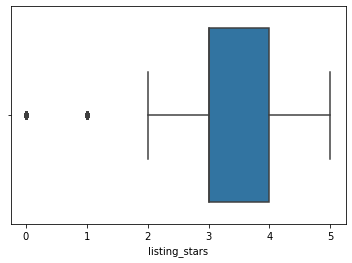

In [40]:
sns.boxplot(x=dataf_2['listing_stars'])

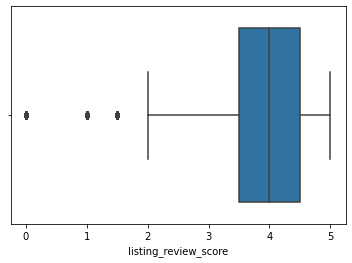

In [41]:
sns.boxplot(x=dataf_2['listing_review_score'])

### Boxplot



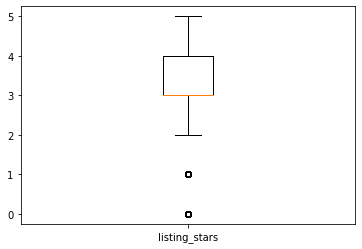

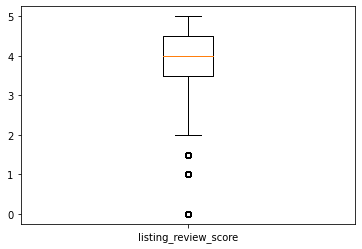

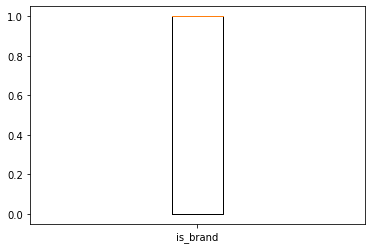

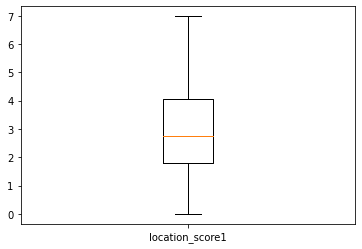

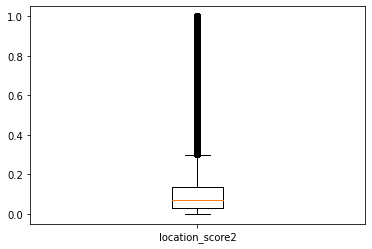

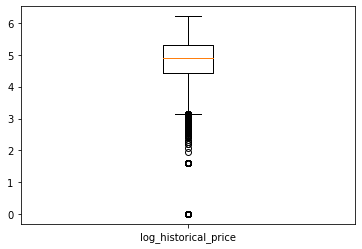

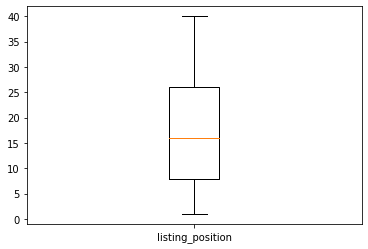

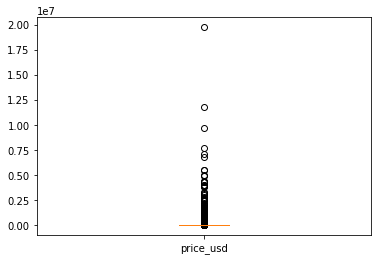

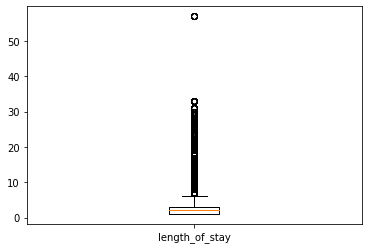

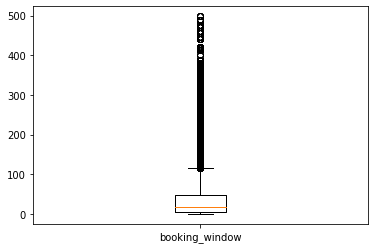

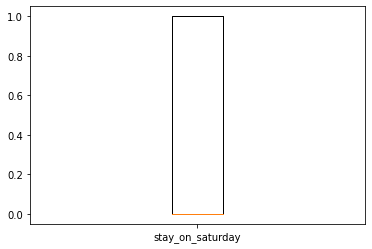

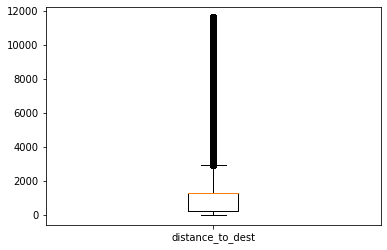

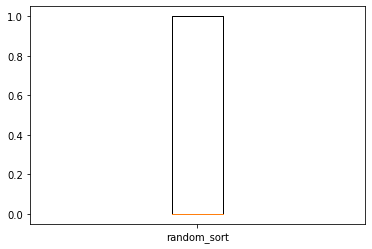

In [42]:
for i in lst3:
    plt.figure()
    (plt.boxplot(dataf_2[i],labels=[i]))
    plt.show()

### Removing Outliars

> In statistics, an outlier is an observation point that is distant from other observations.

> Discover outliers with visualization tools like Scatter plot , Box plot

> Discover outliers with mathematical function

1.   Z-Score-
          The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
2.   IQR score -
          The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.



I have mainly used IQR score.





In [43]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataf_2))
print(z)

[[1.7346493  0.64819205 0.66112502 ... 0.21597624 0.09869006 0.1693742 ]
 [1.7346493  0.64819205 0.66112502 ... 0.21597624 0.09869006 0.1693742 ]
 [1.7346493  0.64819205 0.66112502 ... 0.21597624 0.09869006 0.1693742 ]
 ...
 [1.72515596 0.64819205 0.66112502 ... 0.21597624 0.09869006 0.1693742 ]
 [1.72515596 0.64819205 0.66112502 ... 0.21597624 0.09869006 0.1693742 ]
 [1.72515596 0.64819205 0.66112502 ... 0.21597624 0.09869006 0.1693742 ]]


In [44]:
threshold = 3
print(np.where(z > 3))

(array([     10,      15,      31, ..., 2380548, 2380548, 2380556]), array([ 5,  5, 32, ..., 25, 30, 31]))


In [45]:
print(z[10][5])

3.023142724748695


In [0]:
df_clean = dataf_2.copy()


In [23]:
for i in lst3:
  Q1 = dataf_2[i].quantile(0.25)
  Q3 = dataf_2[i].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - (1.5*IQR)
  upper = Q3 + (1.5*IQR)
  df_clean = df_clean.drop((df_clean[(df_clean[i]<lower) | (df_clean[i]>upper)].index))
print(df_clean)




         search_id  site_id  user_country_id  ...  clicked  booking_value  booked
0                4        5              219  ...        0            0.0       0
1                4        5              219  ...        0            0.0       0
7                4        5              219  ...        0            0.0       0
9                4        5              219  ...        0            0.0       0
11               4        5              219  ...        0            0.0       0
...            ...      ...              ...  ...      ...            ...     ...
2380550     665573        5              219  ...        0            0.0       0
2380551     665573        5              219  ...        0            0.0       0
2380552     665573        5              219  ...        0            0.0       0
2380555     665573        5              219  ...        0            0.0       0
2380556     665573        5              219  ...        0            0.0       0

[1305747 rows x

The data frame without any outliers. 

In [50]:
df_clean.shape

(1305747, 35)

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305747 entries, 0 to 2380556
Data columns (total 35 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   search_id                       1305747 non-null  int64  
 1   site_id                         1305747 non-null  int64  
 2   user_country_id                 1305747 non-null  int64  
 3   listing_country_id              1305747 non-null  int64  
 4   listing_id                      1305747 non-null  int64  
 5   listing_stars                   1305747 non-null  int64  
 6   listing_review_score            1305747 non-null  float64
 7   is_brand                        1305747 non-null  int64  
 8   location_score1                 1305747 non-null  float64
 9   location_score2                 1305747 non-null  float64
 10  log_historical_price            1305747 non-null  float64
 11  listing_position                1305747 non-null  int64  
 12  

In [52]:
df_clean.describe()

,search_id,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor8_rate,competitor8_has_availability,clicked,booking_value,booked
count,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06,1.305747e+06
mean,3.335988e+05,9.079074e+00,1.794978e+02,1.838699e+02,7.011656e+04,3.173328e+00,3.950198e+00,7.060166e-01,2.632836e+00,7.768370e-02,4.965984e+00,1.725640e+01,1.273546e+02,2.132450e-01,1.392212e+04,1.935694e+00,2.220708e+01,1.947181e+00,3.380073e-01,1.111306e+00,5.454043e-01,8.020177e+02,2.641147e-01,1.636917e-02,1.800579e-02,2.528821e-03,2.487771e-02,1.499372e-02,2.692712e-02,2.702773e+01,-3.350573e-02,3.188213e-03,4.238647e-02,8.285280e+00,2.785991e-02
std,1.927217e+05,6.872927e+00,6.372043e+01,6.183520e+01,4.054603e+04,8.305791e-01,6.121892e-01,4.555846e-01,1.389640e+00,6.874572e-02,4.611325e-01,1.046262e+01,6.309556e+01,4.095994e-01,8.062188e+03,1.198726e+00,2.630927e+01,8.517406e-01,7.261205e-01,4.270642e-01,4.979344e-01,6.528828e+02,4.408608e-01,3.051093e-01,1.616537e-01,2.715651e-01,1.904639e-01,3.718374e-01,1.932330e-01,1.867198e+01,3.244253e-01,1.318619e-01,2.014693e-01,7.329273e+01,1.645714e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.140000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.666740e+05,5.000000e+00,1.170000e+02,1.580000e+02,3.522300e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.610000e+00,2.400000e-02,4.650000e+00,8.000000e+00,8.000000e+01,0.000000e+00,7.161000e+03,1.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.746400e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.911079e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.328150e+05,5.000000e+00,2.190000e+02,2.190000e+02,6.967100e+04,3.000000e+00,4.000000e+00,1.000000e+00,2.560000e+00,6.940000e-02,4.950000e+00,1.600000e+01,1.120000e+02,0.000000e+00,1.348300e+04,2.000000e+00,1.100000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.235800e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.911079e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.016390e+05,1.400000e+01,2.190000e+02,2.190000e+02,1.052040e+05,4.000000e+00,4.500000e+00,1.000000e+00,3.610000e+00,9.880000e-02,5.270000e+00,2.600000e+01,1.590000e+02,0.000000e+00,2.090500e+04,3.000000e+00,3.200000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.315759e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.911079e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.655730e+05,3.400000e+01,2.310000e+02,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,3.010000e-01,6.210000e+00,4.000000e+01,3.357700e+02,1.000000e+00,2.841100e+04,6.000000

In [53]:
print(sum(dataf_2['booked']==1))
print(sum(dataf_2['booked']==0))

66388
2314169


In [54]:
print(sum(dataf_2['clicked']==1))
print(sum(dataf_2['clicked']==0))

106094
2274463


In [55]:
print(sum(df_clean['booked']==1))
print(sum(df_clean['booked']==0))

36378
1269369


In [56]:
print(sum(df_clean['clicked']==1))
print(sum(df_clean['clicked']==0))

55346
1250401


oversampling using :

> Decision Tree


> SVM






In [60]:
#evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('over', RandomOverSampler()), ('df_clean', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)
a_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
a_score = mean(a_scores)
print('accuracy Score: %.3f' % a_score)

F1 Score: 0.994
accuracy Score: 0.995


In [61]:
#evaluating a svm  with random oversampling
from sklearn import svm
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('over', RandomOverSampler()), ('df_clean', svm.SVC())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)
a_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
a_score = mean(a_scores)
print('accuracy Score: %.3f' % a_score)

F1 Score: 0.981
accuracy Score: 0.981


In [63]:
!pip install pandas-profiling==2.8.0

     |████████████████████████████████| 266kB 5.7MB/s 
  Found existing installation: pandas-profiling 2.6.0
    Uninstalling pandas-profiling-2.6.0:
      Successfully uninstalled pandas-profiling-2.6.0


Produce the profile report of the cleaned Data - df_clean

In [24]:
import pandas_profiling
from pandas_profiling import ProfileReport
ProfileReport(df_clean)

Output hidden; open in https://colab.research.google.com to view.